In [68]:
#Loading the required packages
import numpy as np 
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt 
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras_preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization,MaxPool2D
from keras.optimizers import RMSprop

In [55]:
#Images Loading for model building data
path = 'C://Fruit Image/fruits_360_original_size/'
image_gen=ImageDataGenerator()
data_train = image_gen.flow_from_directory(path,target_size=(100, 100),batch_size=32)
class_list = list(data_train.class_indices.keys())

Found 1178 images belonging to 12 classes.


In [57]:
#Visualising the original images
def visualise_imgs(loc):
    im = image.load_img(loc, target_size=(100,100,3))
    plt.imshow(im)
    plt.show()

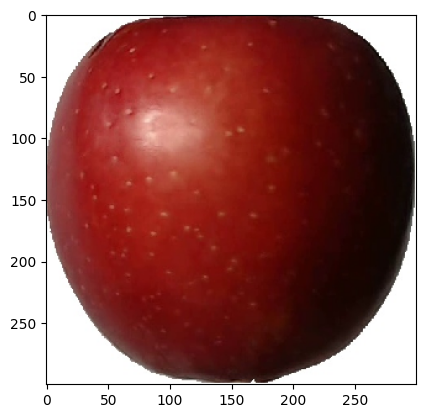

In [4]:
#Implementing the above function to visualise an apple
visualise_imgs("C://Shruti Fruit Image/fruits_360_original_size/apple_braeburn_1/r0_99.jpg")

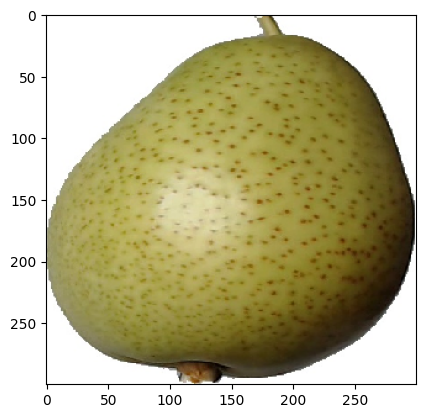

In [5]:
#Implementing the above function to visualise a pear
visualise_imgs("C://Shruti Fruit Image/fruits_360_original_size/pear_1/r0_55.jpg")

In [73]:
#CNN Model Building - Fruit Identification
fruit_img_prcsing_model=Sequential()
fruit_img_prcsing_model.add(Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(100,100,3)))
fruit_img_prcsing_model.add(BatchNormalization())
fruit_img_prcsing_model.add(MaxPool2D((3,3))) 
fruit_img_prcsing_model.add(Dropout(0.35)) 
fruit_img_prcsing_model.add(Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
fruit_img_prcsing_model.add(BatchNormalization())
fruit_img_prcsing_model.add(MaxPool2D((3,3))) 
fruit_img_prcsing_model.add(Dropout(0.35)) 
fruit_img_prcsing_model.add(Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
fruit_img_prcsing_model.add(BatchNormalization())
fruit_img_prcsing_model.add(MaxPool2D((3,3))) 
fruit_img_prcsing_model.add(Dropout(0.35)) 
fruit_img_prcsing_model.add(Flatten())
fruit_img_prcsing_model.add(Dense(512,activation=tf.nn.relu))
fruit_img_prcsing_model.add(Dropout(0.35)) 
fruit_img_prcsing_model.add(Dense(128,activation=tf.nn.relu)) 
fruit_img_prcsing_model.add(Dropout(0.35)) 
fruit_img_prcsing_model.add(Dense(len(class_list),activation='softmax'))

In [74]:
#Fruit Identification model compilation
fruit_img_prcsing_model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [75]:
#Fruit Identification model Summary
fruit_img_prcsing_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_38 (Bat  (None, 98, 98, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_39 (Bat  (None, 30, 30, 64)     

In [76]:
#Fruit Identification model training
hstry = fruit_img_prcsing_model.fit(data_train, epochs=30)

Epoch 1/30
37/37 [==============================] - 17s 446ms/step - loss: 0.2400 - accuracy: 0.5221
Epoch 2/30
37/37 [==============================] - 9s 238ms/step - loss: 0.0888 - accuracy: 0.8285
Epoch 3/30
37/37 [==============================] - 10s 256ms/step - loss: 0.0429 - accuracy: 0.9440
Epoch 4/30
37/37 [==============================] - 11s 286ms/step - loss: 0.0272 - accuracy: 0.9660
Epoch 5/30
37/37 [==============================] - 11s 284ms/step - loss: 0.0178 - accuracy: 0.9796
Epoch 6/30
37/37 [==============================] - 11s 290ms/step - loss: 0.0117 - accuracy: 0.9873
Epoch 7/30
37/37 [==============================] - 11s 291ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 8/30
37/37 [==============================] - 10s 279ms/step - loss: 0.0069 - accuracy: 0.9924
Epoch 9/30
37/37 [==============================] - 11s 286ms/step - loss: 0.0039 - accuracy: 0.9949
Epoch 10/30
37/37 [==============================] - 11s 290ms/step - loss: 0.0086 - accurac

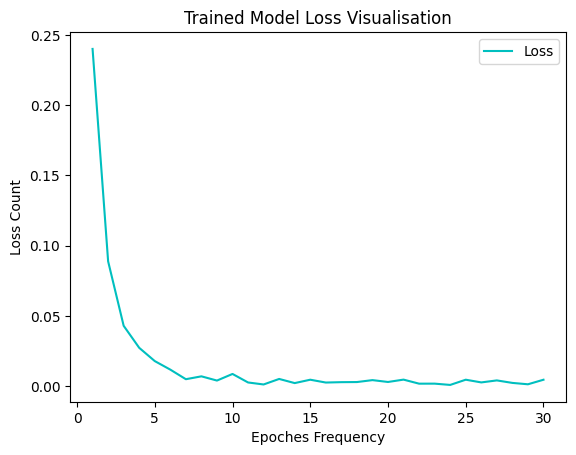

In [77]:
#Loss of the trained model
accu = hstry.history['accuracy']
trn_loss = hstry.history['loss']
epoc = range(1, len(trn_loss) + 1)
plt.plot(epoc, trn_loss, 'c-')
plt.ylabel('Loss Count')
plt.title("Trained Model Loss Visualisation")
plt.xlabel('Epoches Frequency')
plt.legend(['Loss'])

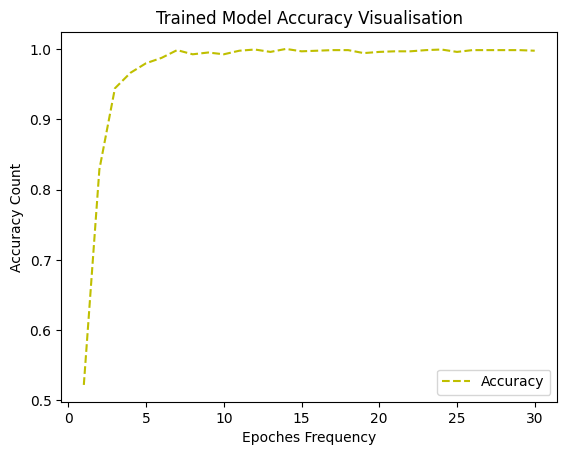

In [78]:
#Accuracy of the trained model
accu = hstry.history['accuracy']
trn_loss = hstry.history['loss']
epoc = range(1, len(trn_loss) + 1)
plt.plot(epoc, accu, 'y--')
plt.ylabel('Accuracy Count')
plt.title("Trained Model Accuracy Visualisation")
plt.xlabel('Epoches Frequency')
plt.legend(['Accuracy'])